<a href="https://colab.research.google.com/github/nicolebendel/regresion_lineal/blob/main/DIabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')

df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [9]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [3]:
tipos_datos = df.dtypes
tipos_datos

fips                        int64
TOT_POP                     int64
0-9                         int64
0-9 y/o % of total pop    float64
19-Oct                      int64
                           ...   
CKD_prevalence            float64
CKD_Lower 95% CI          float64
CKD_Upper 95% CI          float64
CKD_number                  int64
Urban_rural_code            int64
Length: 108, dtype: object

In [10]:
columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()

In [11]:
import numpy as np
columnas_no_numericas = df.select_dtypes(exclude=[np.number])
columnas_no_numericas

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama
...,...,...
3135,Sweetwater,Wyoming
3136,Teton,Wyoming
3137,Uinta,Wyoming
3138,Washakie,Wyoming


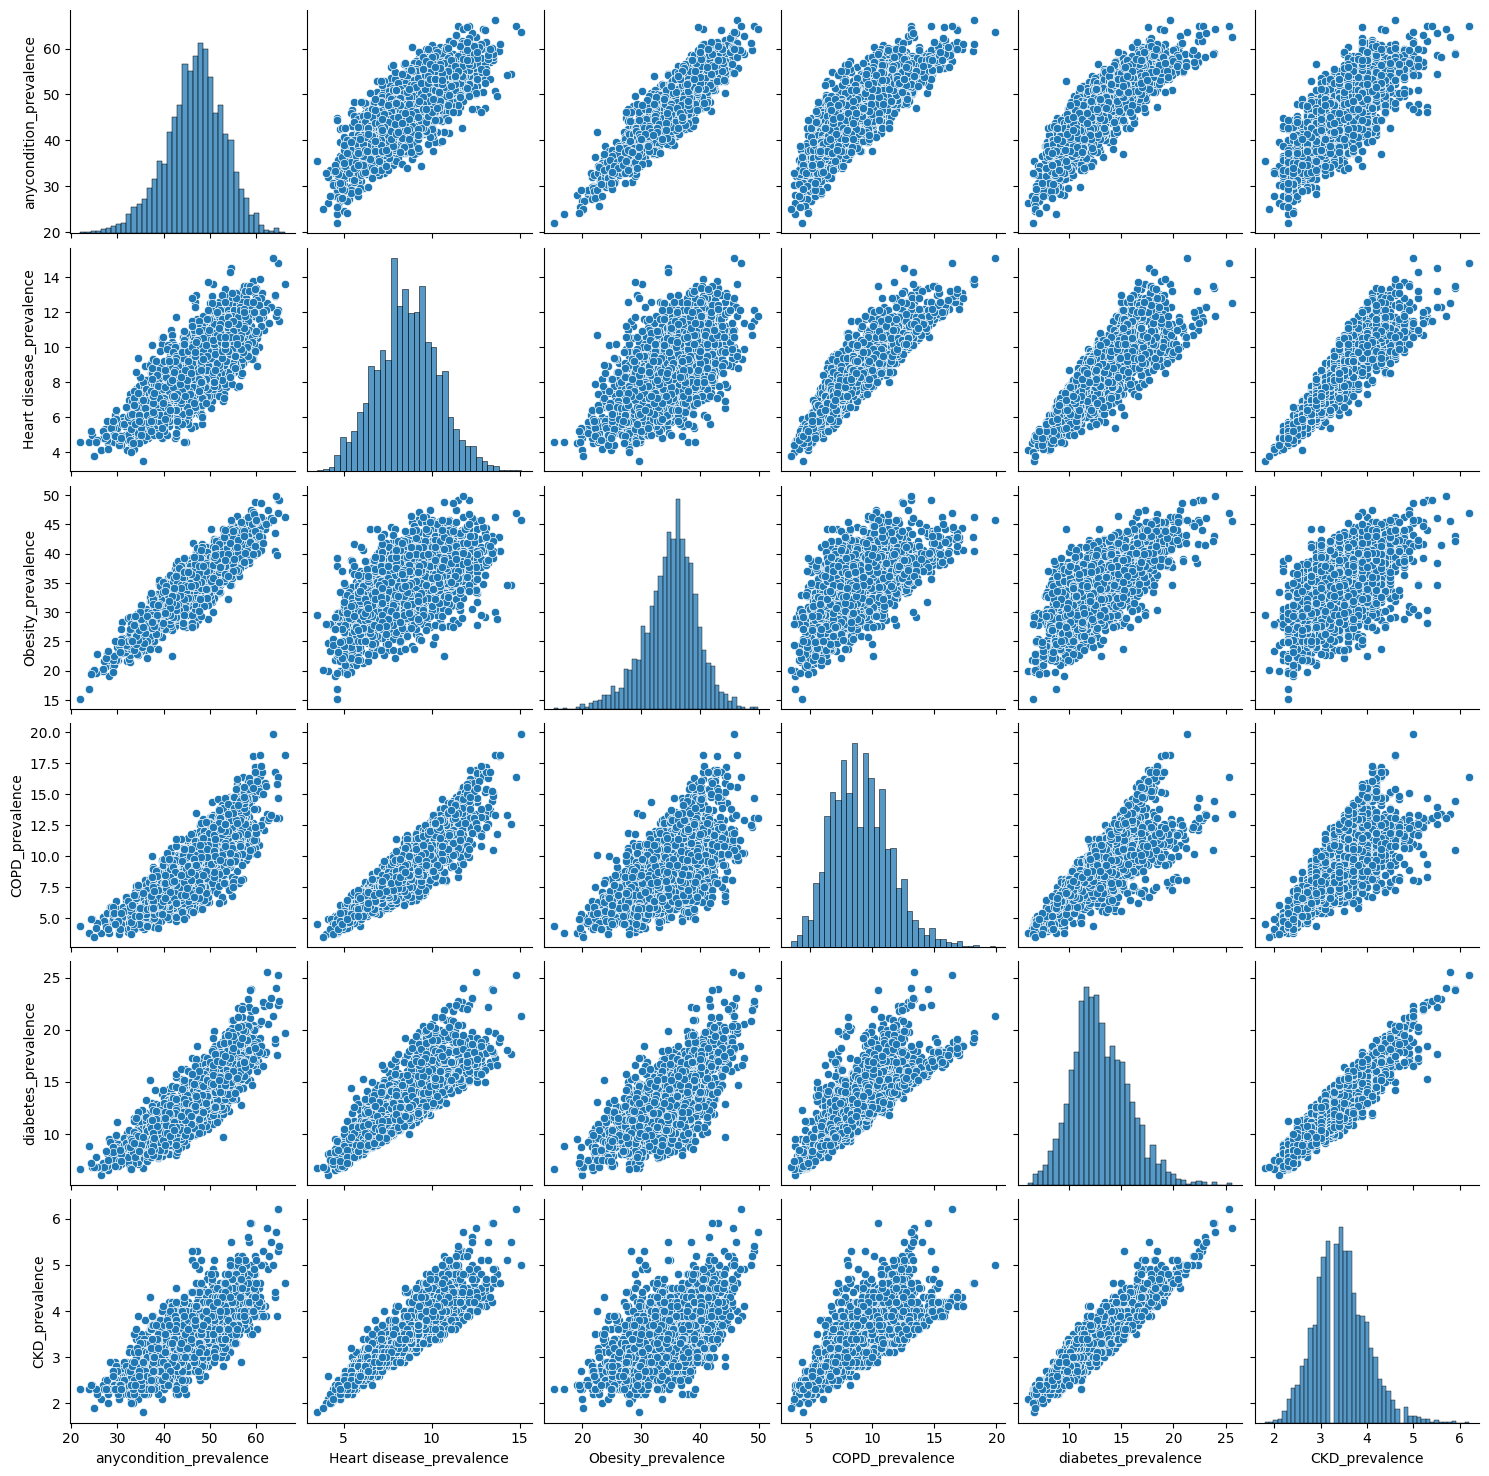

In [15]:

import seaborn as sns

sns.pairplot(data=df[['anycondition_prevalence','Heart disease_prevalence', 'Obesity_prevalence', 'COPD_prevalence','diabetes_prevalence','CKD_prevalence']])

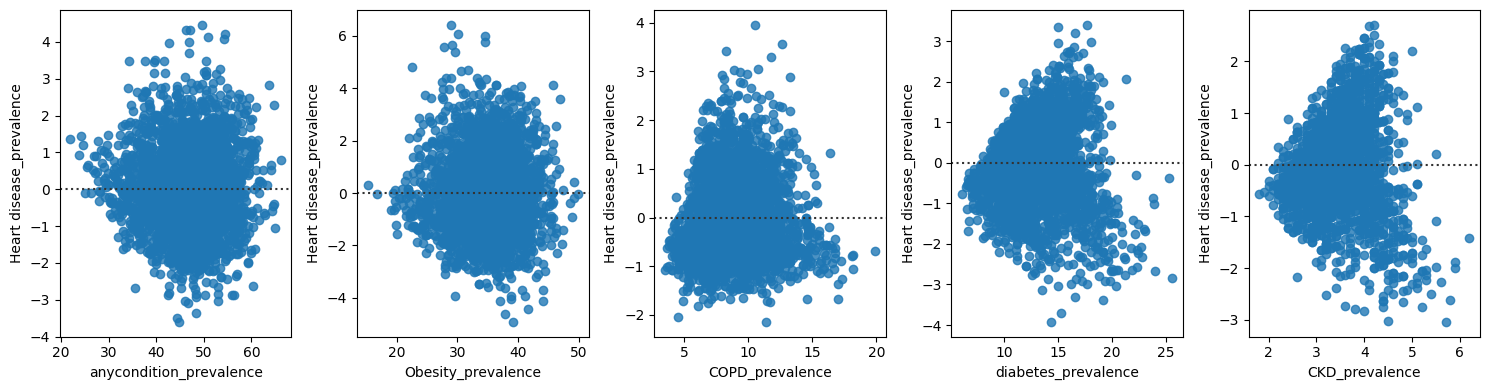

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 4))

sns.residplot(x='anycondition_prevalence', y='Heart disease_prevalence', data=df, ax = axes[0])
sns.residplot(x='Obesity_prevalence', y='Heart disease_prevalence', data=df, ax = axes[1])
sns.residplot(x='COPD_prevalence', y='Heart disease_prevalence', data=df, ax = axes[2])
sns.residplot(x='diabetes_prevalence', y='Heart disease_prevalence', data=df, ax = axes[3])
sns.residplot(x='CKD_prevalence', y='Heart disease_prevalence', data=df, ax = axes[4])

plt.tight_layout()
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columnas_norm = scaler.fit_transform(df[columnas_numericas])

In [13]:

df_normalizado = pd.DataFrame(columnas_norm, index=df.index, columns = columnas_numericas)

df_normalizado

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.138900,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,0.563986,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,-0.219763,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,-0.256918,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,-0.074198,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,1.692310,-0.183307,-0.158761,1.086516,-0.166565,1.101851,-0.183788,0.052482,-0.149837,2.078427,...,-0.237259,-1.532170,-1.444440,-1.576887,-0.218239,-1.489946,-1.530382,-1.485351,-0.212860,0.241457
3136,1.692442,-0.243182,-0.247755,-0.726175,-0.264513,-1.778724,-0.232043,0.182593,-0.200548,3.526243,...,-0.311695,-2.156271,-2.130800,-2.143384,-0.267785,-1.842079,-1.909417,-1.811630,-0.261248,0.241457
3137,1.692574,-0.251523,-0.230123,1.649960,-0.240386,1.705104,-0.248464,-0.536677,-0.228946,0.919318,...,-0.296744,-0.981492,-0.986867,-1.010391,-0.263079,-0.785681,-0.772313,-0.832792,-0.263447,0.241457
3138,1.692706,-0.288743,-0.284261,-0.465984,-0.289869,0.782915,-0.277474,-1.028898,-0.265673,-0.176505,...,-0.338543,-0.651086,-0.681818,-0.691737,-0.290441,-0.081417,-0.014244,-0.017093,-0.292299,0.903618


In [15]:
from sklearn.model_selection import train_test_split

X = df_normalizado
y = df['Obesity_number']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
## no grabo Train y Test por que estoy en collab

In [ ]:
X_test.to_csv('../data/processed/clean_test.csv',index = False)
X_train.to_csv('../data/processed/clean_train.csv',index = False)

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
y_pred

array([2.76900e+03, 6.37220e+04, 5.92700e+03, 2.72200e+04, 4.56260e+04,
       6.17300e+03, 3.09000e+03, 4.58300e+03, 1.32000e+03, 3.61200e+03,
       5.71300e+03, 6.34000e+02, 2.60290e+04, 5.03800e+03, 4.25300e+04,
       1.06880e+04, 2.49336e+05, 5.16200e+03, 8.26400e+03, 1.38500e+03,
       6.33100e+03, 2.80400e+03, 3.31100e+03, 2.26400e+03, 5.57349e+05,
       1.29360e+04, 3.15600e+03, 9.10900e+03, 3.58600e+03, 9.01000e+02,
       4.20200e+03, 9.50000e+03, 9.38200e+03, 1.15440e+04, 3.60150e+04,
       5.75200e+03, 1.06650e+04, 5.04600e+03, 4.00500e+03, 9.93500e+03,
       5.84100e+03, 5.52530e+04, 1.41600e+03, 5.03000e+02, 1.30960e+04,
       2.57800e+03, 1.37900e+03, 2.49520e+04, 3.50500e+03, 2.29000e+03,
       4.97100e+04, 9.89000e+02, 6.57900e+03, 2.06600e+03, 4.57160e+04,
       3.62500e+03, 1.47579e+05, 8.57400e+03, 1.39750e+04, 3.26800e+03,
       3.62880e+04, 6.54000e+02, 2.03000e+03, 4.06600e+04, 6.30200e+03,
       1.55500e+04, 3.17300e+03, 6.86600e+03, 1.36400e+03, 9.484

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 3.400692289528835e-21
Coeficiente de determinación: 1.0


In [20]:
from sklearn.linear_model import Lasso



lasso_model = Lasso(alpha = 0.1, max_iter = 300)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.703e+09, tolerance: 1.602e+09
  model = cd_fast.enet_coordinate_descent(


In [21]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 11065142.031604338
Coeficiente de determinación: 0.9949395407725276


In [22]:
columnas_numericas = [c for c in list(tipos_datos[tipos_datos != object].index) if c != 'Heart disease_number']
columnas_numericas

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [24]:
### Escalar de nuevo,... ( revisarlo por que aun me queda ?? el por que debo hacerlo de nuevo)

scaler = StandardScaler()
col_norm = scaler.fit_transform(df[columnas_numericas])
df_normalizado = pd.DataFrame(col_norm, index=df.index, columns=columnas_numericas)

In [25]:
X = df_normalizado
y = df['Heart disease_number']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
lasso_model = Lasso(alpha=20.0, max_iter=10000)
lasso_model.fit(X_train, y_train)

Lasso(alpha=20.0, max_iter=10000)

In [27]:
y_pred_lasso = lasso_model.predict(X_test)
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred_lasso)}")

Error cuadrático medio: 223402.09325244144
Coeficiente de determinación: 0.9974475763977915


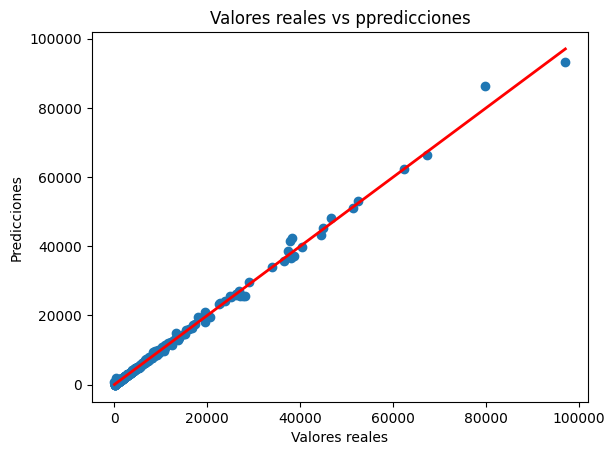

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs ppredicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()